In [1]:
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "output" / "13_loading_preprocess_w_TF/extra_exercises"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print("Saving figure", fig_id)

In [2]:
# to make this notebook's output stable across runs
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # silent warning for TF 0 = all logs, 1 = INFO, 2 = WARNING, 3 = ERROR 

import tensorflow as tf

print("TensorFlow version:", tf.__version__)

from packaging import version
import sklearn

print("sklearn version:", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

TensorFlow version: 2.20.0
sklearn version: 1.7.2


In [3]:
img = tf.random.uniform(shape=[28, 28], dtype=tf.float32)
img_bytes = img.numpy().tobytes()

In [4]:
example = tf.train.Example(
    features=tf.train.Features(
        feature={
            "height": tf.train.Feature(int64_list=tf.train.Int64List(value=[28])),
            "width": tf.train.Feature(int64_list=tf.train.Int64List(value=[28])),
            "image_raw": tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_bytes])),
        }
    )
)

In [5]:
serialized = example.SerializeToString()

In [6]:
img = tf.io.decode_png(tf.io.read_file("datasets/personbufs/gundam1.jpg"))
img_bytes = tf.io.encode_png(img).numpy()

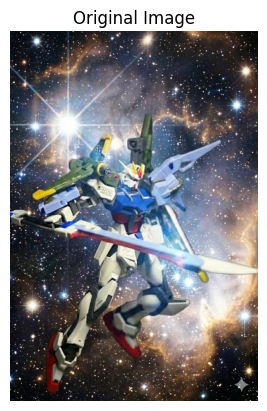

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [8]:
img_batch = tf.random.uniform([2, 28, 28])

In [9]:
for img in img_batch:
    img_bytes = img.numpy().tobytes()
    # write TFRecord example here

Tip: Hashing usage

In [10]:
# Cryptographic (SHA‑256)
import hashlib

h = hashlib.sha256(b"hello").hexdigest()
print(h)

2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824


In [11]:
# Non‑cryptographic (MurmurHash via TensorFlow)

tf.strings.to_hash_bucket_fast("hello", num_buckets=1000)

<tf.Tensor: shape=(), dtype=int64, numpy=296>